# Importing the libraries

In [0]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive

# Reading and oragnizing data

In [0]:
#Read csv file
df = pd.read_csv('Colab Notebooks/HAR_finaldata(balanced).csv')
df.head()

,TS,X,Y,Z,Activity
0,1.568343e+12,1.980011,6.500259,-5.748474,WALKING
1,1.568343e+12,-0.659607,2.807205,-7.180206,WALKING
2,1.568343e+12,1.491592,6.153091,-7.762009,WALKING
3,1.568343e+12,1.388641,15.265427,-1.556229,WALKING
4,1.568343e+12,0.052673,16.572662,-3.014298,WALKING


In [0]:
df.describe()

,TS,X,Y,Z
count,1.199960e+05,119996.000000,119996.000000,119996.000000
mean,1.568803e+12,0.092203,-1.081236,2.423769
std,6.170930e+08,2.964049,9.104918,5.880244
min,1.567919e+12,-27.394455,-39.225403,-35.585022
25%,1.567920e+12,-1.236603,-8.491043,-1.589000
50%,1.569233e+12,0.154419,-0.013168,1.063000
75%,1.569320e+12,1.454483,4.324226,8.908829
max,1.569569e+12,29.546844,38.291670,36.722267


# **Visualize data**

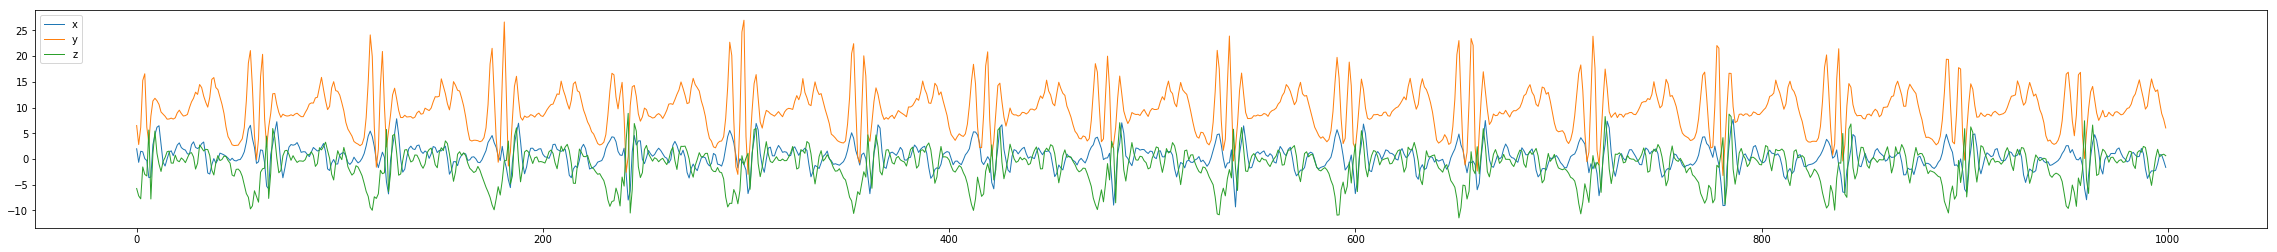

In [0]:
#plot of walking
plt.figure(figsize=(40,4))
ts = np.arange(0,1000)
z= df["Z"].iloc[0:1000]
y= df["Y"].iloc[0:1000]
x= df["X"].iloc[0:1000]
plt.plot(ts, x, lw=1)
plt.plot(ts, y, lw=1)
plt.plot(ts, z, lw=1)
plt.legend(['x', 'y', 'z'], loc='upper left')
plt.show()

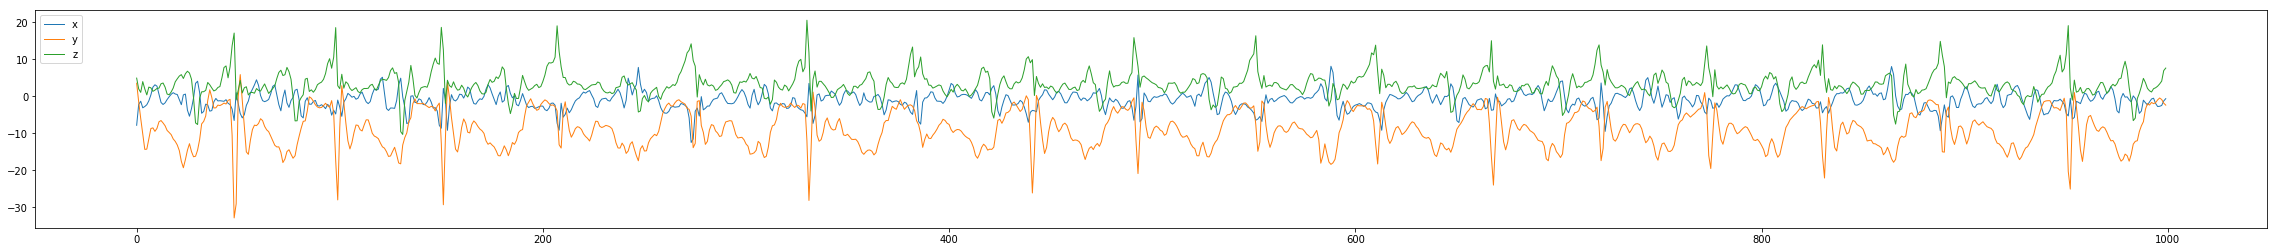

In [0]:
plt.figure(figsize=(40,4))
ts = np.arange(0,1000)
z= df["Z"].iloc[30001:31001]
y= df["Y"].iloc[30001:31001]
x= df["X"].iloc[30001:31001]
plt.plot(ts, x, lw=1)
plt.plot(ts, y, lw=1)
plt.plot(ts, z, lw=1)
plt.legend(['x', 'y', 'z'], loc='upper left')
plt.show()

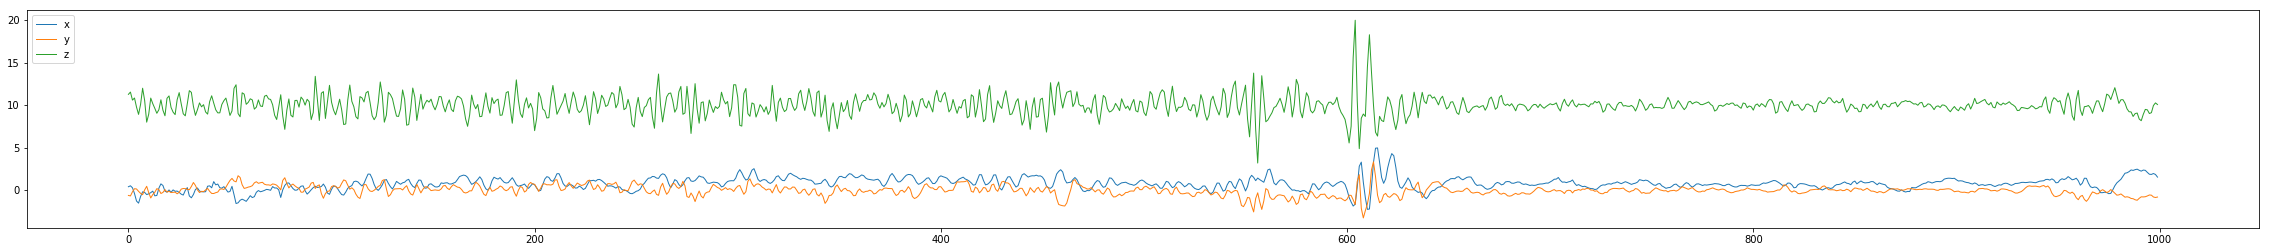

In [0]:
plt.figure(figsize=(40,4))
ts = np.arange(0,1000)
z= df["Z"].iloc[60000:61000]
y= df["Y"].iloc[60000:61000]
x= df["X"].iloc[60000:61000]
plt.plot(ts, x, lw=1)
plt.plot(ts, y, lw=1)
plt.plot(ts, z, lw=1)
plt.legend(['x', 'y', 'z'], loc='upper left')
plt.show()

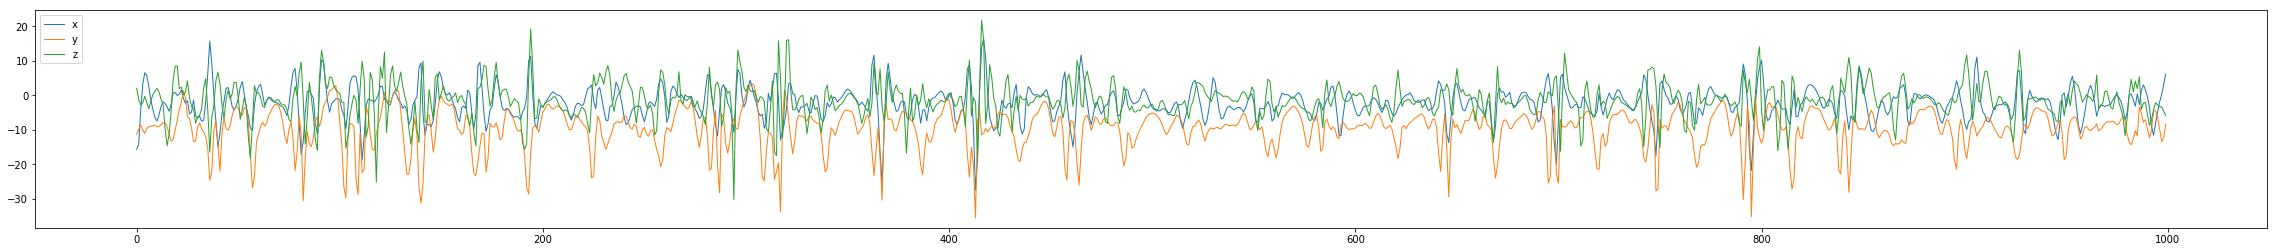

In [0]:
plt.figure(figsize=(40,4))
ts = np.arange(0,1000)
z= df["Z"].iloc[91000:92000]
y= df["Y"].iloc[91000:92000]
x= df["X"].iloc[91000:92000]
plt.plot(ts, x, lw=1)
plt.plot(ts, y, lw=1)
plt.plot(ts, z, lw=1)
plt.legend(['x', 'y', 'z'], loc='upper left')
plt.show()

# **Remove NaN values**

In [0]:

if((df.isnull().any()).any()):
  print("----------Data has NaN values-----------")
  print(df.isnull().sum())
  df.replace('',np.nan, inplace=True)
  df=df.dropna()
  print('----------------')
  print(df.isnull().sum())
else:
  print("----------Data is clean-----------")

----------Data has NaN values-----------
TS          3
X           3
Y           3
Z           3
Activity    3
dtype: int64
----------------
TS          0
X           0
Y           0
Z           0
Activity    0
dtype: int64


In [0]:
def split(df):
  X=df.iloc[:,1:4]
  print(X.head(3))
  y=df.iloc[:,4:5]
  print("------------------------")
  print(y.head(3))
  return X,y
def one(y):
  y=pd.get_dummies(y)
  print(y.head(3))
  return y

In [0]:
X,y=split(df)
#y=one(y)

          X         Y         Z
0  1.980011  6.500259 -5.748474
1 -0.659607  2.807205 -7.180206
2  1.491592  6.153091 -7.762009
------------------------
  Activity
0  WALKING
1  WALKING
2  WALKING


In [0]:
#Splitting the dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('X_train shape:'+str(X_train.shape))
print('y_train shape:'+str(y_train.shape))
print('X_test shape:'+str(X_test.shape))
print('y_test shape:'+str(y_test.shape))

X_train shape:(95996, 3)
y_train shape:(95996, 1)
X_test shape:(24000, 3)
y_test shape:(24000, 1)


# **SVC**

In [0]:
Cs=[0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
gamma= [1e-2, 1e-3, 1e-4, 1e-5]
cs_final=0
g_final=0
score=0
for c in Cs:
  for g in gamma:
    svc=SVC(kernel='rbf', gamma=g, C=c)
    svc.fit(X_train,y_train.values.ravel())
    y_pred=svc.predict(X_test)
    scoretemp=metrics.accuracy_score(y_test.values.ravel(), y_pred)
    print("Accuracy:",scoretemp)
    if scoretemp > score:
      score=scoretemp
      g_final=g
      cs_final=c
    

Accuracy: 0.648625
Accuracy: 0.6107916666666666
Accuracy: 0.5299583333333333


In [0]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7145833333333333


# **Random Forest**

In [0]:
clf = RandomForestClassifier(n_estimators=300, criterion='entropy')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.64475
